# Portfolio Project Walkthrough (Kaggle Titanic)

In [1]:
#Importing Useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
df=pd.read_csv('tested.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.shape

(418, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
#Displaying summary statistics for the categorical variables
df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [10]:
#Exploring if there are any missing values in the data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
#Handling the missing values by dropping cabin and imputing age and fare
df=df.drop(columns=['Cabin'])
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
#Checking missing values after dropping cabin and imputing age and fare
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
#Finding the rate of survival by Pclass
df.groupby(['Pclass'], as_index=False)['Survived'].mean()                

,Pclass,Survived
0,1,0.467290
1,2,0.322581
2,3,0.330275


In [15]:
#Finding the rate of survival by Sex
df.groupby(['Sex'], as_index=False)['Survived'].mean() 

,Sex,Survived
0,female,1.0
1,male,0.0


In [16]:
# Finding the rate of survival by siblings
df.groupby(['SibSp'], as_index=False)['Survived'].mean() 

,SibSp,Survived
0,0,0.310954
1,1,0.490909
2,2,0.428571
3,3,0.250000
4,4,0.250000
5,5,1.000000
6,8,0.500000


In [17]:
# Finding the rate of survival by parch
df.groupby(['Parch'], as_index=False)['Survived'].mean() 

,Parch,Survived
0,0,0.305556
1,1,0.538462
2,2,0.606061
3,3,0.666667
4,4,1.000000
5,5,0.000000
6,6,0.000000
7,9,0.500000


In [18]:
#Creating the family size column by combining the SibSp, Parch, and the passenger
df['Family_Size']=df['SibSp']+df['Parch']+1

In [19]:
# Finding the rate of survival by family size
df.groupby(['Family_Size'], as_index=False)['Survived'].mean() 

,Family_Size,Survived
0,1,0.268775
1,2,0.486486
2,3,0.526316
3,4,0.714286
4,5,0.285714
5,6,0.666667
6,7,0.250000
7,8,0.500000
8,11,0.500000


In [20]:
#Grouping the family size
family_map={1:'Alone', 2:'Small', 3:'Small', 4:'Small', 5:'Medium', 6:'Medium', 7:'Large', 8:'Large', 11:'Large'}
df['Grouped Family Size']=df['Family_Size'].map(family_map)

In [21]:
# Finding the rate of survival by the grouped family size
df.groupby(['Grouped Family Size'], as_index=False)['Survived'].mean() 

,Grouped Family Size,Survived
0,Alone,0.268775
1,Large,0.400000
2,Medium,0.400000
3,Small,0.524138


In [22]:
# Finding the rate of survival by Embarked
df.groupby(['Embarked'], as_index=False)['Survived'].mean() 

,Embarked,Survived
0,C,0.392157
1,Q,0.521739
2,S,0.325926


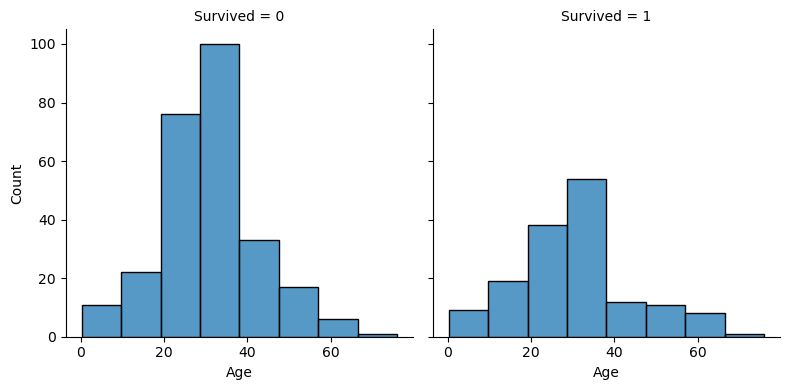

In [23]:

sns.displot(df,x='Age', col='Survived', binwidth=10, height=4)

In [24]:
# Creating the new variable by cutting the 'Age' into 8 quantile-based bins, dropping duplicate edges
df['Age_Cut'] = pd.qcut(df['Age'], 8, duplicates='drop')

In [25]:
# Finding the rate of survival by Age_Cut
df.groupby(['Age_Cut'], as_index=False)['Survived'].mean() 

,Age_Cut,Survived
0,"(0.169, 18.0]",0.444444
1,"(18.0, 23.0]",0.433333
2,"(23.0, 27.0]",0.264151
3,"(27.0, 30.273]",0.319328
4,"(30.273, 35.75]",0.333333
5,"(35.75, 45.0]",0.358491
6,"(45.0, 76.0]",0.423077


In [26]:
#Replacing the age with category number (0,1,2,3,4,5,6) as stated on the prevevious cell.
df.loc[df['Age']<=18, 'Age']=0
df.loc[(df['Age']>18)&(df['Age']<=23), 'Age']=1
df.loc[(df['Age']>23)&(df['Age']<=27), 'Age']=2
df.loc[(df['Age']>27)&(df['Age']<=30.273), 'Age']=3
df.loc[(df['Age']>30.273)&(df['Age']<=35.75), 'Age']=4
df.loc[(df['Age']>35.75)&(df['Age']<=45), 'Age']=5
df.loc[(df['Age']>45)&(df['Age']<=76), 'Age']=6

In [27]:
df['Age'].head()

0    4.0
1    6.0
2    6.0
3    2.0
4    1.0
Name: Age, dtype: float64

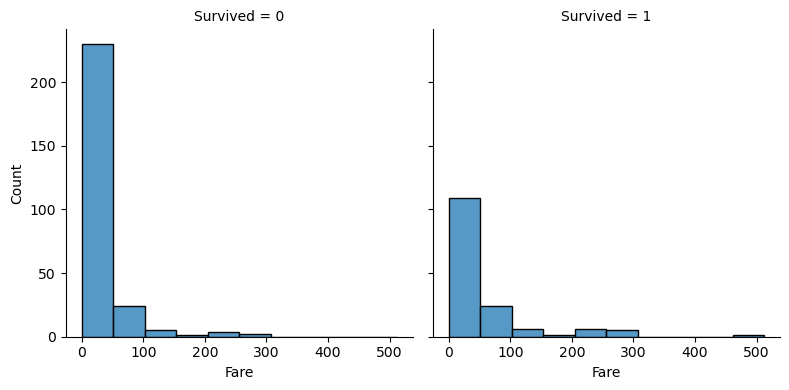

In [28]:
#The distribution of Fare
sns.displot(df,x='Fare', col='Survived', binwidth=50, height=4)

In [29]:
# Creating the new variable by cutting the 'Fare' into 6 quantile-based bins, dropping duplicate edges
df['Fare_Cut'] = pd.qcut(df['Fare'], 6, duplicates='drop')

In [30]:
# Finding the rate of survival by Fare_Cut
df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()

,Fare_Cut,Survived
0,"(-0.001, 7.762]",0.300000
1,"(7.762, 8.662]",0.263158
2,"(8.662, 14.454]",0.234375
3,"(14.454, 26.0]",0.421053
4,"(26.0, 55.969]",0.435484
5,"(55.969, 512.329]",0.528571


In [31]:
#Replacing the fare with category number (0,1,2,3,4,5) as stated on the prevevious cell.
df.loc[df['Fare']<=7.762, 'Fare']=0
df.loc[(df['Fare']>7.762)&(df['Fare']<=8.662), 'Fare']=1
df.loc[(df['Fare']>8.662)&(df['Fare']<=14.454), 'Fare']=2
df.loc[(df['Fare']>14.454)&(df['Fare']<=26), 'Fare']=3
df.loc[(df['Fare']>26)&(df['Fare']<=55.969), 'Fare']=4
df.loc[(df['Fare']>55.969)&(df['Fare']<=512.3292), 'Fare']=5

In [32]:
df['Fare'].head()

0    1.0
1    0.0
2    2.0
3    2.0
4    2.0
Name: Fare, dtype: float64

In [33]:
df['Name']

0                                  Kelly, Mr. James
1                  Wilkes, Mrs. James (Ellen Needs)
2                         Myles, Mr. Thomas Francis
3                                  Wirz, Mr. Albert
4      Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                           ...                     
413                              Spector, Mr. Woolf
414                    Oliva y Ocana, Dona. Fermina
415                    Saether, Mr. Simon Sivertsen
416                             Ware, Mr. Frederick
417                        Peter, Master. Michael J
Name: Name, Length: 418, dtype: object

In [34]:
#Creating a Tittle column
df['Title']=df['Name'].str.split(pat= ",", expand=True)[1].str.split(pat= ".", expand=True)[0].apply(lambda x: x.strip())

In [35]:
# Finding the rate of survival by Title
df.groupby(['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Col,0.0
1,Dona,1.0
2,Dr,0.0
3,Master,0.0
4,Miss,1.0
5,Mr,0.0
6,Mrs,1.0
7,Ms,1.0
8,Rev,0.0


In [36]:
#Creating the new variable(Name_Length)
df['Name_Length']=df['Name'].apply(lambda x: len(x))

In [37]:
df['Name_Length'].head()

0    16
1    32
2    25
3    16
4    44
Name: Name_Length, dtype: int64

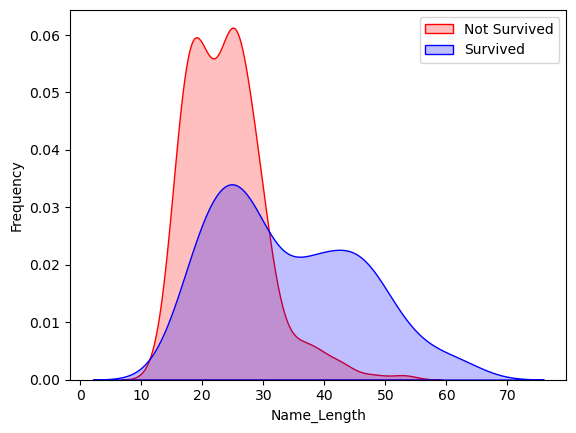

In [38]:
g=sns.kdeplot(df['Name_Length'][(df['Survived']==0)&(df['Name_Length'].notnull())], color='Red',fill=True)
g=sns.kdeplot(df['Name_Length'][(df['Survived']==1)&(df['Name_Length'].notnull())], color='Blue',fill=True)
g.set_xlabel('Name_Length')
g.set_ylabel('Frequency')
g=g.legend(['Not Survived', 'Survived'])

In [39]:
# Creating the new variable by cutting the 'Name_Length' into 8 quantile-based bins, dropping duplicate edges
df['Name_LengthGB'] = pd.qcut(df['Name_Length'], 8, duplicates='drop')

In [40]:
# Finding the rate of survival by Name_LengthGB
df.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()

,Name_LengthGB,Survived
0,"(12.999, 18.0]",0.128571
1,"(18.0, 20.0]",0.222222
2,"(20.0, 23.0]",0.306122
3,"(23.0, 25.0]",0.203704
4,"(25.0, 27.0]",0.318182
5,"(27.0, 30.75]",0.333333
6,"(30.75, 41.0]",0.571429
7,"(41.0, 63.0]",0.897959


In [41]:
#Replacing the Name_Length with category number (0,1,2,3,4,5,6,7) as stated on the prevevious cell.
df.loc[df['Name_Length']<=18, 'Name_Length']=0
df.loc[(df['Name_Length']>18)&(df['Name_Length']<=20), 'Name_Length']=1
df.loc[(df['Name_Length']>20)&(df['Name_Length']<=23), 'Name_Length']=2
df.loc[(df['Name_Length']>23)&(df['Name_Length']<=25), 'Name_Length']=3
df.loc[(df['Name_Length']>25)&(df['Name_Length']<=27), 'Name_Length']=4
df.loc[(df['Name_Length']>27)&(df['Name_Length']<=30.75), 'Name_Length']=5
df.loc[(df['Name_Length']>30.75)&(df['Name_Length']<=41), 'Name_Length']=6
df.loc[(df['Name_Length']>41)&(df['Name_Length']<=63), 'Name_Length']=7

In [42]:
df['Name_Length'].head()

0    0
1    6
2    3
3    0
4    7
Name: Name_Length, dtype: int64

In [43]:
df['Ticket']

0                  330911
1                  363272
2                  240276
3                  315154
4                 3101298
              ...        
413             A.5. 3236
414              PC 17758
415    SOTON/O.Q. 3101262
416                359309
417                  2668
Name: Ticket, Length: 418, dtype: object

In [44]:
#Creating the variable (Ticket Number)
df['TicketNumber']=df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))

In [45]:
df.groupby(['TicketNumber'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False) 

,TicketNumber,count,mean
73,17608,5,0.6
111,2343,4,0.5
13,113503,4,0.5
207,31029,3,0.0
262,347077,3,0.0
...,...,...,...
133,248659,1,0.0
132,244368,1,0.0
131,244360,1,0.0
130,244358,1,0.0


In [46]:
df.groupby('TicketNumber')['TicketNumber'].transform('count')

0      1
1      1
2      1
3      1
4      1
      ..
413    1
414    1
415    1
416    1
417    1
Name: TicketNumber, Length: 418, dtype: int64

In [47]:
df['TicketNumberCounts']=df.groupby('TicketNumber')['TicketNumber'].transform('count')

In [48]:
df.groupby(['TicketNumberCounts'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False) 

,TicketNumberCounts,count,mean
0,1,319,0.332288
1,2,68,0.485294
2,3,18,0.333333
3,4,8,0.500000
4,5,5,0.600000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          418 non-null    int64   
 1   Survived             418 non-null    int64   
 2   Pclass               418 non-null    int64   
 3   Name                 418 non-null    object  
 4   Sex                  418 non-null    object  
 5   Age                  418 non-null    float64 
 6   SibSp                418 non-null    int64   
 7   Parch                418 non-null    int64   
 8   Ticket               418 non-null    object  
 9   Fare                 418 non-null    float64 
 10  Embarked             418 non-null    object  
 11  Family_Size          418 non-null    int64   
 12  Grouped Family Size  418 non-null    object  
 13  Age_Cut              418 non-null    category
 14  Fare_Cut             418 non-null    category
 15  Title                41

In [50]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Family_Size',
       'Grouped Family Size', 'Age_Cut', 'Fare_Cut', 'Title', 'Name_Length',
       'Name_LengthGB', 'TicketNumber', 'TicketNumberCounts'],
      dtype='object')

In [51]:
columns_to_drop=['Grouped Family Size', 'Age_Cut', 'Fare_Cut', 'Name', 'Name_Length',
       'Name_LengthGB', 'TicketNumber', 'TicketNumberCounts']
df = df.drop(columns=columns_to_drop)

In [52]:
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Title
0,892,0,3,male,4.0,0,0,330911,1.0,Q,1,Mr
1,893,1,3,female,6.0,1,0,363272,0.0,S,2,Mrs
2,894,0,2,male,6.0,0,0,240276,2.0,Q,1,Mr


### Transforming the data into dummy variables

The machine learning modelling cannot handle categorical values, it can only handle numerical values.
Convert categorical values into numerical values.

In [53]:
cat_col=df.select_dtypes('object').columns.tolist()

In [54]:
cat_col

['Sex', 'Ticket', 'Embarked', 'Title']

Convert the above categorical values into numerical values

In [55]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder with sparse_output=False to get a dense array
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the data
encoder.fit_transform(df[cat_col])

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [56]:
encoded_cols = encoder.get_feature_names_out(cat_col)

In [57]:
encoded_cols

array(['Sex_female', 'Sex_male', 'Ticket_110469', 'Ticket_110489',
       'Ticket_110813', 'Ticket_111163', 'Ticket_112051', 'Ticket_112058',
       'Ticket_112377', 'Ticket_112378', 'Ticket_112901', 'Ticket_113038',
       'Ticket_113044', 'Ticket_113054', 'Ticket_113059', 'Ticket_113503',
       'Ticket_113509', 'Ticket_113773', 'Ticket_113778', 'Ticket_113780',
       'Ticket_113781', 'Ticket_113790', 'Ticket_113791', 'Ticket_113795',
       'Ticket_113796', 'Ticket_113801', 'Ticket_11753', 'Ticket_11765',
       'Ticket_11767', 'Ticket_11769', 'Ticket_11770', 'Ticket_11778',
       'Ticket_11813', 'Ticket_1222', 'Ticket_12749', 'Ticket_13050',
       'Ticket_13236', 'Ticket_13508', 'Ticket_13567', 'Ticket_13695',
       'Ticket_13905', 'Ticket_1601', 'Ticket_16966', 'Ticket_17463',
       'Ticket_17464', 'Ticket_17475', 'Ticket_17765', 'Ticket_17770',
       'Ticket_19877', 'Ticket_19924', 'Ticket_19928', 'Ticket_19950',
       'Ticket_2003', 'Ticket_211535', 'Ticket_21228', 'Ticke

In [58]:
#Adding transformed columns to the data
df[encoded_cols] = encoder.transform(df[cat_col])

In [59]:
#Displaying first 3 rows
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,Embarked_S,Title_Col,Title_Dona,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rev
0,892,0,3,male,4.0,0,0,330911,1.0,Q,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,893,1,3,female,6.0,1,0,363272,0.0,S,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,894,0,2,male,6.0,0,0,240276,2.0,Q,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [60]:
#Dropping categorical columns from the data
df.drop(columns=cat_col, inplace=True)

In [61]:
df.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,...,Embarked_S,Title_Col,Title_Dona,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rev
0,892,0,3,4.0,0,0,1.0,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,893,1,3,6.0,1,0,0.0,2,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,894,0,2,6.0,0,0,2.0,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [62]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Family_Size', 'Sex_female', 'Sex_male',
       ...
       'Embarked_S', 'Title_Col', 'Title_Dona', 'Title_Dr', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev'],
      dtype='object', length=385)

In [64]:
# Separating the explanatory variables and the response variable
X = df.drop(columns=['Survived'])
y = df['Survived']

In [65]:
X.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Ticket_110469,...,Embarked_S,Title_Col,Title_Dona,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rev
0,892,3,4.0,0,0,1.0,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,893,3,6.0,1,0,0.0,2,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,894,2,6.0,0,0,2.0,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [66]:
y.head(3)

0    0
1    1
2    0
Name: Survived, dtype: int64

### Scaling Variables

All independent columns are in different scales. Bring all columns into a single scale.
This step is called standardising/normalising/preprocessing data.

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [68]:
X[:] = scaler.transform(X)

In [69]:
X.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Ticket_110469,...,Embarked_S,Title_Col,Title_Dona,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rev
0,0.000000,1.0,0.666667,0.000,0.0,0.2,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.002398,1.0,1.000000,0.125,0.0,0.0,0.1,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.004796,0.5,1.000000,0.000,0.0,0.4,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Dividing dataset into train dataset and test dataset

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [71]:
#Exploring the shapes for train and test datasets for both the explanatory and the response (Risk) variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((334, 384), (84, 384), (334,), (84,))

### Model Evaluation

In [72]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [73]:
# Define the models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [74]:
# Create an empty dictionary to store the results
results = {}

In [75]:
# Loop over each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store the results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix
    }

In [76]:
# Display the results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print(f"F1 Score: {metrics['F1 Score']:.2f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])


Model: Logistic Regression
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[50  0]
 [ 0 34]]

Model: Decision Tree
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[50  0]
 [ 0 34]]

Model: Random Forest
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[50  0]
 [ 0 34]]

Model: Support Vector Machine
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[50  0]
 [ 0 34]]

Model: K-Nearest Neighbors
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[50  0]
 [ 0 34]]
